# Making a line with (x, y) steps

The purpose of this exercise is to calculate the discreet x and y steps (like we might have from a stepper motor) needed to make a line of any slope.  Note: this uses Bresenhan's Algorithm https://en.wikipedia.org/wiki/Bresenham%27s_line_algorithm

The general equation of a line through two given points is: $${\frac {y-y_{0}}{y_{1}-y_{0}}}={\frac {x-x_{0}}{x_{1}-x_{0}}}$$

Let's use the example of the two points (0,0) and (20,10)

The equation for this line is then: $$ {\frac {y-0}{10-0}}={\frac {x-0}{20-0}}$$
or $$y={\frac {x}{2}}$$

So, for every time $x$ makes a step, $y$ moves ${\frac {1}{2}}$ step.
Since there are no half steps we need to round and return the 'error' to be accumulated as we travel from $(x_{0}, y_{0})$ to $(x_{1}, y_{1})$.  Note: we also need to return the current position.

In [1]:
# First do some imports, so we can see what we're doing:
%matplotlib notebook

import matplotlib.pyplot as plt
from math import sqrt

import numpy as np

In [2]:
def get_line(start, end):
    """Bresenham's Line Algorithm
    from: http://www.roguebasin.com/index.php?title=Bresenham%27s_Line_Algorithm
    Produces a list of tuples from start and end
 
    >>> points1 = get_line((0, 0), (3, 4))
    >>> points2 = get_line((3, 4), (0, 0))
    >>> assert(set(points1) == set(points2))
    >>> print points1
    [(0, 0), (1, 1), (1, 2), (2, 3), (3, 4)]
    >>> print points2
    [(3, 4), (2, 3), (1, 2), (1, 1), (0, 0)]
    """
    # Setup initial conditions
    x1, y1 = start
    x2, y2 = end
    dx = x2 - x1
    dy = y2 - y1
 
    # Determine how steep the line is
    is_steep = abs(dy) > abs(dx)
 
    # Rotate line
    if is_steep:
        x1, y1 = y1, x1
        x2, y2 = y2, x2
 
    # Swap start and end points if necessary and store swap state
    swapped = False
    if x1 > x2:
        x1, x2 = x2, x1
        y1, y2 = y2, y1
        swapped = True
 
    # Recalculate differentials
    dx = x2 - x1
    dy = y2 - y1
 
    # Calculate error
    error = int(dx / 2.0)
    ystep = 1 if y1 < y2 else -1
 
    # Iterate over bounding box generating points between start and end
    y = y1
    points = []
    for x in range(x1, x2 + 1):
        coord = (y, x) if is_steep else (x, y)
        points.append(coord)
        error -= abs(dy)
        if error < 0:
            y += ystep
            error += dx
 
    # Reverse the list if the coordinates were swapped
    if swapped:
        points.reverse()
    return points

<IPython.core.display.Javascript object>


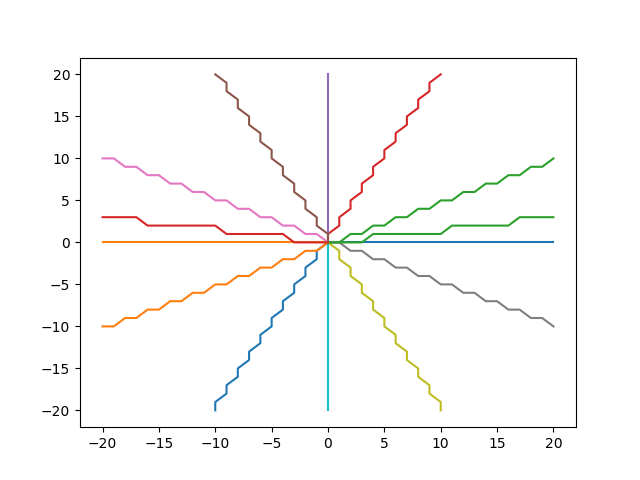

In [3]:
points = [(20,0), (-20, 0), (20, 10), (10, 20), (0, 20), 
          (-10, 20), (-20, 10), (20, -10), (10, -20), 
          (0, -20), (-10, -20), (-20, -10),
          (20, 3), (-20, 3)]

for point in points:
    line = get_line((0,0), point)
    x, y = zip(*line)
    plt.plot(x, y)

## Converting x, y coordinates to cable lengths

``` 
           d
m1 o______________o m2
    \          __/
     \      __/
    a \  __/ b
       \/
       *
      (x,y)
    ```

Given the coordinates $(x,y)$, we need to calculate the lengths of the two cables which hold the pen, $a$ and $b$.

$a$ is the hypotenuse of a triangle with sides $x$ and $y$, so the length of a is: $$a = {\sqrt {x^2 + y^2}}$$
If the distance between the motors is $d$, then the length of $b$ is given by: $$b = {\sqrt {(d-x)^2 + y^2}}$$

So, if we're looking to draw a line between the "points" $(10, 10)$ and $(25, 50)$, let's first get our cable length targets.  Here's a function to do that:

In [60]:
def cable_steps(x, y, d=100, steps_per_unit=1):
    a = int((sqrt(x**2 + y**2))*steps_per_unit)
    b = int((sqrt((d-x)**2 + y**2))*steps_per_unit)
    return a, b

In [109]:
d = 1000

# Get cable lengths (measured in steps) for our two points (measured in inches):
x0, y0 = (850, 400)
x1, y1 = (220, 350)

a0, b0 = cable_steps(x0, y0, d=d)
a1, b1 = cable_steps(x1, y1, d=d)

In [110]:
a_move = a1-a0
b_move = b1-b0
print a0, b0
print a1, b1
print a_move, b_move

939 427
413 854
-526 427


<IPython.core.display.Javascript object>


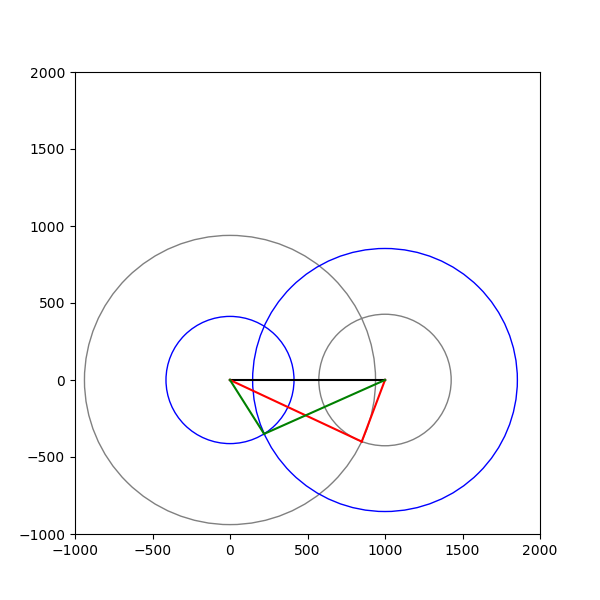

In [111]:
# plot what we know about a couple of points

fig = plt.figure(figsize=(6, 6))

# the motors
m1 = plt.Circle((0, 0), 4, color='black')
m2 = plt.Circle((d, 0), 4, color='black')

# the line between the motors
m_line = plt.Line2D([0, d], [0, 0], color='black')

# the radius of the cables and pen position - start
m1_circle0 = plt.Circle((0, 0), a0, color='gray', fill=False)
m2_circle0 = plt.Circle((d, 0), b0, color='gray', fill=False)
m1_line0 = plt.Line2D([0, x0], [0, -y0], color='red')
m2_line0 = plt.Line2D([d, x0], [0, -y0], color='red')
pen_pos0 = plt.Circle([x0, -y0], 1.0, color='red', fill=False)

# the radius of the cables and pen position - end
m1_circle1 = plt.Circle((0, 0), a1, color='blue', fill=False)
m2_circle1 = plt.Circle((d, 0), b1, color='blue', fill=False)
m1_line1 = plt.Line2D([0, x1], [0, -y1], color='green')
m2_line1 = plt.Line2D([d, x1], [0, -y1], color='green')
pen_pos1 = plt.Circle([x1, -y1], 1.0, color='green', fill=False)

# set a wide range, since mpl is acting goofy about this
plt.axis([-d, 2*d, -d, 2*d])
ax = fig.gca()
ax.set_autoscale_on(False)


# pile all this onto our figure axis
ax.add_artist(m1)
ax.add_artist(m2)
ax.add_artist(m_line)

ax.add_artist(m1_line0)
ax.add_artist(m2_line0)
ax.add_artist(m1_line1)
ax.add_artist(m2_line1)
ax.add_artist(m1_circle0)
ax.add_artist(m2_circle0)
ax.add_artist(pen_pos0)
ax.add_artist(m1_circle1)
ax.add_artist(m2_circle1)
ax.add_artist(pen_pos1)

**This** is where we call our function to get our line movement:

In [112]:
path = get_line((x0, y0), (x1, y1))

In [113]:
path[:20]  # show the first 20 locations in path

[(850, 400),
 (849, 400),
 (848, 400),
 (847, 400),
 (846, 400),
 (845, 400),
 (844, 400),
 (843, 399),
 (842, 399),
 (841, 399),
 (840, 399),
 (839, 399),
 (838, 399),
 (837, 399),
 (836, 399),
 (835, 399),
 (834, 399),
 (833, 399),
 (832, 399),
 (831, 398)]

<IPython.core.display.Javascript object>


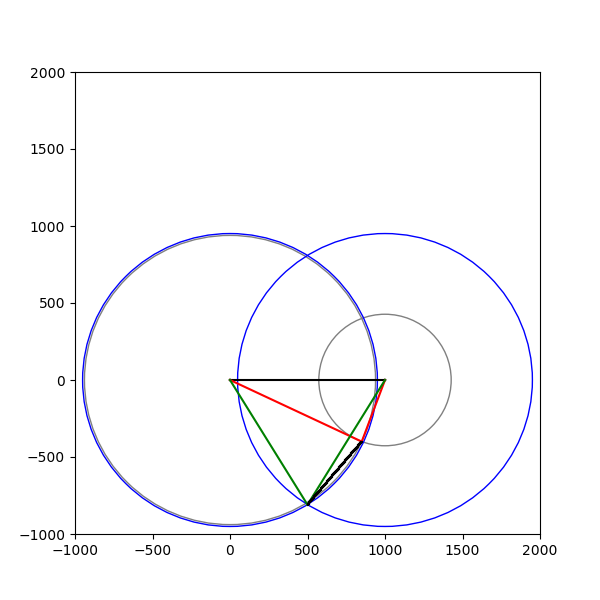

In [119]:
x0, y0 = (850, 400)
x1, y1 = (500, 810)

a0, b0 = cable_steps(x0, y0, d=d)
a1, b1 = cable_steps(x1, y1, d=d)

path = get_line((x0, y0), (x1, y1))

fig2 = plt.figure(figsize=(6, 6))

# the motors
m1 = plt.Circle((0, 0), 4, color='black')
m2 = plt.Circle((d, 0), 4, color='black')

# the line between the motors
m_line = plt.Line2D([0,d], [0, 0], color='black')

# the radius of the cables and pen position - start
m1_circle0 = plt.Circle((0, 0), a0, color='gray', fill=False)
m2_circle0 = plt.Circle((d, 0), b0, color='gray', fill=False)
m1_line0 = plt.Line2D([0, x0], [0, -y0], color='red')
m2_line0 = plt.Line2D([d, x0], [0, -y0], color='red')
pen_pos0 = plt.Circle([x0, -y0], 1.0, color='red', fill=False)

# the radius of the cables and pen position - end
m1_circle1 = plt.Circle((0, 0), a1, color='blue', fill=False)
m2_circle1 = plt.Circle((d, 0), b1, color='blue', fill=False)
m1_line1 = plt.Line2D([0, x1], [0, -y1], color='green')
m2_line1 = plt.Line2D([d, x1], [0, -y1], color='green')
pen_pos1 = plt.Circle([x1, -y1], 1.0, color='green', fill=False)

# set a wide range, since mpl is acting goofy about this
plt.axis([-d, 2*d, -d, 2*d])
ax = fig2.gca()
ax.set_autoscale_on(False)


# pile all this onto our figure axis
ax.add_artist(m1)
ax.add_artist(m2)
ax.add_artist(m_line)

ax.add_artist(m1_line0)
ax.add_artist(m2_line0)
ax.add_artist(m1_line1)
ax.add_artist(m2_line1)
ax.add_artist(m1_circle0)
ax.add_artist(m2_circle0)
ax.add_artist(pen_pos0)
ax.add_artist(m1_circle1)
ax.add_artist(m2_circle1)
ax.add_artist(pen_pos1)

curr_point = path[0]
for point in path[1:]:
    x0, y0 = curr_point
    x1, y1 = point
    
    a0, b0 = cable_steps(x0, y0)
    a1, b1 = cable_steps(x1, y1)
    
    line_segx = plt.Line2D([x0, x1], [-y0, -y0], color='black')
    line_segy = plt.Line2D([x1, x1], [-y0, -y1], color='black')
    ax.add_artist(line_segx)
    ax.add_artist(line_segy)
    
    curr_point = point

In [9]:
# Import GPIO Libraries
import RPi.GPIO as GPIO
import time

In [10]:
class Motor(object):
    
    def __init__(self, pins, delay=4, initial_position=25):
        """ pins are provided in the sequence A1, A2, B1, B2
        
        """
        
        GPIO.setmode(GPIO.BCM)
        GPIO.setup(pins[0], GPIO.OUT)
        GPIO.setup(pins[1], GPIO.OUT)
        GPIO.setup(pins[2], GPIO.OUT)
        GPIO.setup(pins[3], GPIO.OUT)
        self.pins = pins
        self.state = ''
        self.delay = delay/1000.0
        self.initial_position = initial_position
        self.current_position = initial_position
        self.reverse_seq = ['1001', '1010', '0110', '0101']
        self.forward_seq = ['0101', '0110', '1010', '1001']  
        
    def _set_step(self, step):
        self.state = step
        GPIO.output(self.pins[0], step[0] == '1')
        GPIO.output(self.pins[1], step[1] == '1')
        GPIO.output(self.pins[2], step[2] == '1')
        GPIO.output(self.pins[3], step[3] == '1')
        
    def _move_forward(self, steps, delay=None):
        if not delay:
            delay = self.delay

        for i in range(steps):
            for step in self.forward_seq:
                self._set_step(step)
                time.sleep(delay)

    def _move_backward(self, steps, delay=None):
        if not delay:
            delay = self.delay
            
        for i in range(steps):
            for step in self.reverse_seq:
                self._set_step(step)
                time.sleep(delay)
        
        
    def move(self, steps):
        if steps > 0:
            self._move_forward(abs(steps))
        else:
            self._move_backward(abs(steps))
        self.current_position += steps


In [11]:
del motor_x
del motor_y

NameError: name 'motor_x' is not defined

In [12]:
motor_x = Motor(pins=(18, 23, 24, 17))
motor_y = Motor(pins=(16, 21, 12, 20))

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:9: RuntimeWarning: This channel is already in use, continuing anyway.  Use GPIO.setwarnings(False) to disable warnings.
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:10: RuntimeWarning: This channel is already in use, continuing anyway.  Use GPIO.setwarnings(False) to disable warnings.
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:11: RuntimeWarning: This channel is already in use, continuing anyway.  Use GPIO.setwarnings(False) to disable warnings.
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:12: RuntimeWarning: This channel is already in use, continuing anyway.  Use GPIO.setwarnings(False) to disable warnings.


In [13]:
motor_x._set_step('0000')
motor_y._set_step('0000')

In [14]:
svg_file_name = 'img/geneva_1.svg'

In [114]:
shelton_path = np.array([[ 1, 21],
       [ 4, 19],
       [ 6, 20],
       [ 7, 20],
       [ 8, 20],
       [ 9, 20],
       [10, 21],
       [13, 21],
       [14, 21],
       [15, 21],
       [15, 20],
       [18, 21],
       [19, 21],
       [20, 21],
       [21, 20],
       [20, 23],
       [20, 24],
       [21, 24],
       [21, 25],
       [22, 26],
       [22, 27],
       [23, 27],
       [24, 28],
       [24, 29],
       [25, 29],
       [25, 30],
       [26, 30],
       [26, 31],
       [27, 32],
       [27, 31],
       [26, 22],
       [28, 20],
       [23, 18],
       [26, 15],
       [28,  3],
       [27,  3],
       [26,  3],
       [26,  4],
       [25,  4],
       [25,  5],
       [24,  5],
       [24,  6],
       [23,  6],
       [23,  7],
       [23,  8],
       [22,  8],
       [22,  9],
       [22, 10],
       [23, 11],
       [24, 11],
       [24, 12],
       [23, 12],
       [24, 13],
       [25, 12],
       [26, 12],
       [26, 11],
       [25, 10],
       [26, 10],
       [27, 10],
       [28,  9],
       [27, 12],
       [28, 13],
       [27, 13],
       [27, 14],
       [25, 13],
       [24, 14],
       [23, 16],
       [21, 15],
       [21, 14],
       [21, 12],
       [20, 11],
       [21, 10],
       [20, 10],
       [19, 10],
       [19,  9],
       [18,  9],
       [17, 11],
       [17, 10],
       [17,  8],
       [16,  8],
       [16,  9],
       [15,  9],
       [15,  8],
       [14,  8],
       [14,  7],
       [13,  7],
       [12,  7],
       [12,  8],
       [12,  9],
       [11,  8],
       [11,  7],
       [10,  7],
       [11,  9],
       [10, 10],
       [10,  9],
       [ 9,  7],
       [ 8,  7],
       [ 7,  7],
       [ 7,  8],
       [ 6,  8],
       [ 5,  8],
       [ 5,  9],
       [ 4,  9],
       [ 3,  9],
       [ 3, 10],
       [ 2, 11],
       [ 2, 12],
       [ 2, 13],
       [ 2, 14],
       [ 2, 15],
       [ 2, 16],
       [ 2, 17],
       [ 3, 11],
       [ 4, 10],
       [10, 13],
       [11, 13],
       [12, 13],
       [12, 14],
       [10, 14],
       [10, 15],
       [12, 15],
       [21, 18],
       [17, 16],
       [16, 16],
       [17, 14],
       [16, 14],
       [16, 13],
       [16, 12],
       [15, 12],
       [14, 12],
       [14, 11],
       [14, 10],
       [13,  9],
       [13, 10],
       [11, 10],
       [11, 11],
       [12, 10],
       [12, 11],
       [13, 11],
       [14, 13],
       [14, 14],
       [14, 15],
       [14, 16],
       [12, 16],
       [11, 17],
       [ 6, 19],
       [ 5, 19],
       [ 4, 18],
       [ 3, 17],
       [ 3, 18]])

In [157]:
box_path = [(1, 1), (-20, 1), (-20, 20), (1, 20), (1, 1)]
work_path = shelton_path

In [159]:
current_point = work_path[0]
for point in work_path[1:]:
    x0, y0 = current_point
    x1, y1 = point
    
    # Get cable lengths (measured in steps) for our two points (measured in 'units'):
    a0, b0 = cable_steps(x0, y0, steps_per_unit=5)
    a1, b1 = cable_steps(x1, y1, steps_per_unit=5)
    
    #print "cable: (%s, %s) to (%s, %s)" % (a0, b0, a1, b1)

    path = get_line((a0, b0), (a1, b1))
    #print "path: %s" % path
    
    prev_position = list(path[0])
    for position in path[1:]:
        move_x = position[0]-prev_position[0]
        move_y = position[1]-prev_position[1]

        motor_x.move(move_x)
        motor_y.move(move_y)
        
        prev_position = position
    
    current_point = x1, y1

motor_x._set_step('0000')
motor_y._set_step('0000')

cable: (105, 107) to (97, 95)
path: [(105, 107), (104, 106), (104, 105), (103, 104), (102, 103), (102, 102), (101, 101), (100, 100), (100, 99), (99, 98), (98, 97), (98, 96), (97, 95)]
cable: (97, 95) to (104, 100)
path: [(97, 95), (98, 96), (99, 96), (100, 97), (101, 98), (102, 99), (103, 99), (104, 100)]
cable: (104, 100) to (105, 100)
path: [(104, 100), (105, 100)]
cable: (105, 100) to (107, 100)
path: [(105, 100), (106, 100), (107, 100)]
cable: (107, 100) to (109, 101)
path: [(107, 100), (108, 100), (109, 101)]
cable: (109, 101) to (116, 106)
path: [(109, 101), (110, 102), (111, 102), (112, 103), (113, 104), (114, 105), (115, 105), (116, 106)]
cable: (116, 106) to (123, 110)
path: [(116, 106), (117, 107), (118, 107), (119, 108), (120, 108), (121, 109), (122, 109), (123, 110)]
cable: (123, 110) to (126, 112)
path: [(123, 110), (124, 111), (125, 111), (126, 112)]
cable: (126, 112) to (129, 114)
path: [(126, 112), (127, 113), (128, 113), (129, 114)]
cable: (129, 114) to (125, 109)
path

[(2, 2), (1, 1)]